In [6]:
# Import necessary libraries
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers
from keras.utils import to_categorical

In [7]:
# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [8]:
train_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [9]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [10]:
# Load and Preprocess the MNIST Dataset
# Preprocess the data

# Normalize the images.
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

In [11]:
# Flatten the images.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

In [12]:
# Convert labels to one-hot vectors
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [13]:
# Define the model without regularization
model_no_reg = Sequential([
  Dense(64, activation='relu', input_shape=(784,)),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax'),
])

In [14]:
# Compile the model
model_no_reg.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [15]:
# Train the model without regularization
history_no_reg = model_no_reg.fit(
  train_images,
  train_labels,
  epochs=5,  # Train for multiple epochs to capture the learning curve
  batch_size=32,
  verbose=0
)

In [16]:
# Define the model with L2 regularization
model_l2_reg = Sequential([
  Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(784,)),
  Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
  Dense(10, activation='softmax'),
])

## The below are the code for L1 and dropout regularization

```
model_l1_reg = Sequential([
  Dense(64, activation='relu', kernel_regularizer=regularizers.l1(0.001), input_shape=(784,)),
  Dense(64, activation='relu', kernel_regularizer=regularizers.l1(0.001)),
  Dense(10, activation='softmax'),
])
```

```
model_dropout = Sequential([
  Dense(64, activation='relu', input_shape=(784,)),
  Dropout(0.2),
  Dense(64, activation='relu'),
  Dropout(0.2),
  Dense(10, activation='softmax'),
])
```

<h2>Note:</h2> For dropout , we have to import it from the a separate library , "from keras.layers import Dropout"

In [17]:
# Compile the model
model_l2_reg.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [19]:
history_l2_reg = model_l2_reg.fit(
  train_images,
  train_labels,
  epochs=5,  # Train for multiple epochs to capture the learning curve
  batch_size=32,
  verbose=0
)

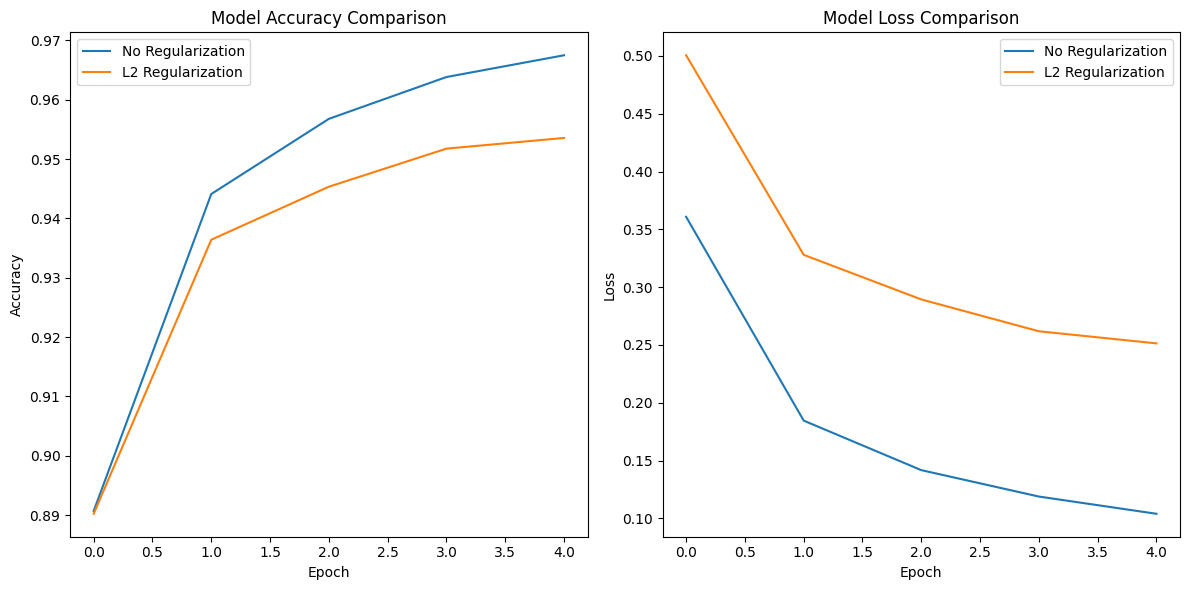

In [20]:
# Plotting the comparison
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history_no_reg.history['accuracy'], label='No Regularization')
plt.plot(history_l2_reg.history['accuracy'], label='L2 Regularization')
plt.title('Model Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history_no_reg.history['loss'], label='No Regularization')
plt.plot(history_l2_reg.history['loss'], label='L2 Regularization')
plt.title('Model Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()